In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('newmeta.csv', low_memory=False)

In [4]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['abstract']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(data)
data.head(5)

,abstract,publish_time
0,objective retrospective chart review describes...,2001-07-04
1,inflammatory diseases respiratory tract common...,2000-08-15
2,surfactant proteind spd participates innate re...,2000-08-25
3,endothelin1 et1 21 amino acid peptide diverse ...,2001-02-22
4,respiratory syncytial virus rsv pneumonia viru...,2001-05-11


In [6]:
data.to_csv('processed.csv', index=False)

In [7]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['abstract']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]

[['objective',
  'retrospective',
  'chart',
  'review',
  'describes',
  'epidemiology',
  'clinical',
  'features',
  '40',
  'patients',
  'cultureproven',
  'mycoplasma',
  'pneumoniae',
  'infections',
  'king',
  'abdulaziz',
  'university',
  'hospital',
  'jeddah',
  'saudi',
  'arabia',
  'methods',
  'patients',
  'positive',
  'pneumoniae',
  'cultures',
  'respiratory',
  'specimens',
  'january',
  '1997',
  'december',
  '1998',
  'identified',
  'microbiology',
  'records',
  'charts',
  'patients',
  'reviewed',
  'results',
  '40',
  'patients',
  'identified',
  '33',
  '825',
  'required',
  'admission',
  'infections',
  '925',
  'communityacquired',
  'infection',
  'affected',
  'age',
  'groups',
  'common',
  'infants',
  '325',
  'preschool',
  'children',
  '225',
  'occurred',
  'yearround',
  'common',
  'fall',
  '35',
  'spring',
  '30',
  'threequarters',
  'patients',
  '775',
  'comorbidities',
  'twentyfour',
  'isolates',
  '60',
  'associated',
  'pn

In [20]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(fname='model.png', format='png')
    plt.show()
   

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


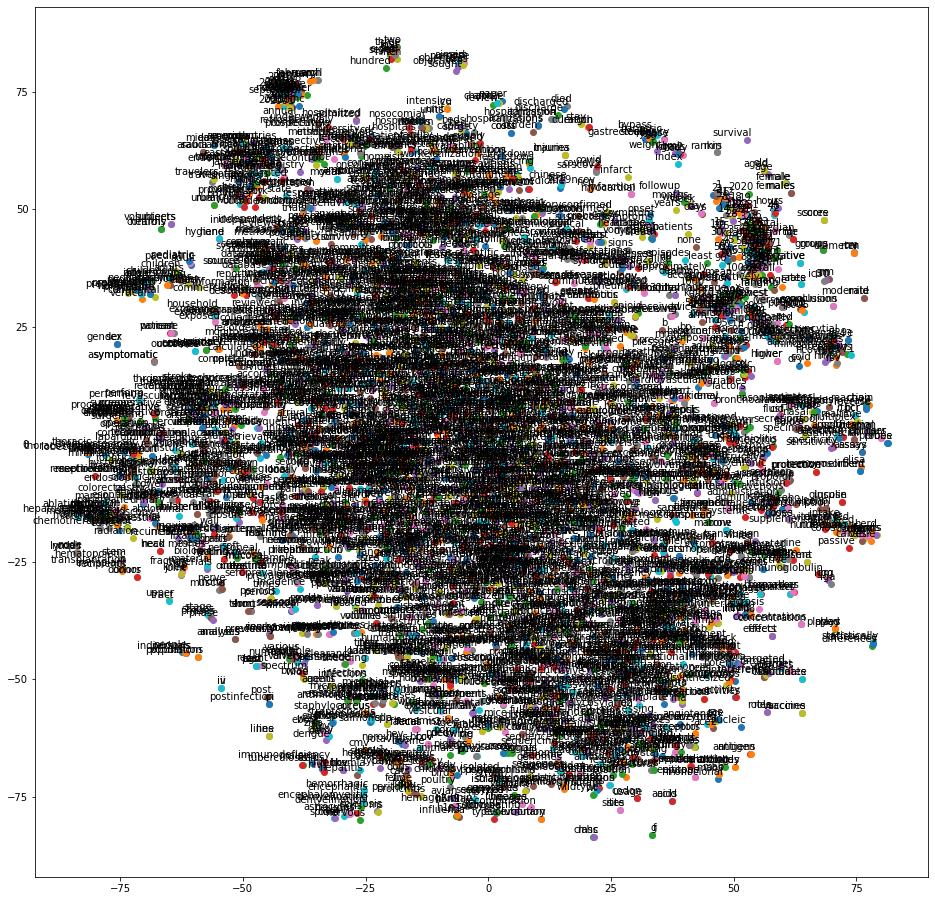

In [23]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
tsne_plot(model)

In [24]:
model.most_similar('patient')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.6127897500991821),
 ('patients', 0.5534685850143433),
 ('case', 0.5442690849304199),
 ('discharged', 0.5367958545684814),
 ('physician', 0.4858970046043396),
 ('team', 0.4787141978740692),
 ('managed', 0.467002809047699),
 ('resolved', 0.4546450972557068),
 ('ward', 0.44436943531036377),
 ('discharge', 0.43582770228385925)]

In [26]:
model.most_similar('covid19')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sarscov2', 0.6995458006858826),
 ('covid', 0.657250165939331),
 ('2020', 0.533859372138977),
 ('situation', 0.533176839351654),
 ('frontline', 0.454300194978714),
 ('italian', 0.44802600145339966),
 ('2019ncov', 0.443092405796051),
 ('wuhan', 0.4381031394004822),
 ('2019', 0.42518001794815063),
 ('pandemic', 0.42449212074279785)]

In [27]:
model.most_similar('infect')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('infecting', 0.7759742736816406),
 ('replicate', 0.7146686911582947),
 ('enter', 0.6123653650283813),
 ('humans', 0.6061530113220215),
 ('hosts', 0.5766274929046631),
 ('reservoir', 0.5612740516662598),
 ('transmitted', 0.5457327961921692),
 ('unlike', 0.5154514312744141),
 ('originated', 0.5105512142181396),
 ('tropism', 0.5062000751495361)]

In [28]:
model.most_similar('viral')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('virus', 0.6376374959945679),
 ('viruses', 0.5655294060707092),
 ('virusinduced', 0.48260921239852905),
 ('host', 0.47948241233825684),
 ('iav', 0.4556509554386139),
 ('rna', 0.4511429965496063),
 ('replication', 0.4436368942260742),
 ('antiviral', 0.43261095881462097),
 ('bacterial', 0.42506998777389526),
 ('cellular', 0.41835516691207886)]

In [29]:
model.most_similar('lungs')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('lung', 0.7151894569396973),
 ('alveolar', 0.6822238564491272),
 ('infiltration', 0.6289802193641663),
 ('edema', 0.587173342704773),
 ('epithelium', 0.5847057104110718),
 ('organs', 0.5843857526779175),
 ('interstitial', 0.5751709938049316),
 ('diffuse', 0.5709408521652222),
 ('histopathological', 0.5588952302932739),
 ('lobe', 0.5510231852531433)]

In [30]:
model.most_similar('ventilator')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ventilators', 0.804341733455658),
 ('ventilation', 0.7823624610900879),
 ('tidal', 0.7435311079025269),
 ('breathing', 0.7080253958702087),
 ('ventilated', 0.6993008852005005),
 ('mechanical', 0.6427785158157349),
 ('peep', 0.6332980394363403),
 ('gas', 0.5435755252838135),
 ('weaning', 0.5391837954521179),
 ('tracheostomy', 0.531329870223999)]

In [31]:
model.most_similar('treatment')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('therapy', 0.7937396764755249),
 ('treatments', 0.7532981038093567),
 ('corticosteroids', 0.6500003337860107),
 ('treating', 0.6379594802856445),
 ('regimen', 0.630281925201416),
 ('therapies', 0.6286343336105347),
 ('supportive', 0.6283664703369141),
 ('regimens', 0.6063132882118225),
 ('cure', 0.5947235822677612),
 ('therapeutic', 0.5776439905166626)]

In [32]:
model.most_similar('cure')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('treatment', 0.5947235822677612),
 ('remission', 0.5393761992454529),
 ('therapy', 0.5097948312759399),
 ('treat', 0.5086055397987366),
 ('treating', 0.5026177167892456),
 ('treatments', 0.4849409759044647),
 ('drugs', 0.4828059673309326),
 ('therapies', 0.46144232153892517),
 ('effective', 0.4569926857948303),
 ('remdesivir', 0.4378637671470642)]

In [33]:
model.most_similar('pneumonia')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('communityacquired', 0.6672735214233398),
 ('atypical', 0.6212505102157593),
 ('cap', 0.6009598970413208),
 ('aetiology', 0.5771054029464722),
 ('coinfection', 0.5555428862571716),
 ('streptococcus', 0.5289422273635864),
 ('pneumoniae', 0.5229219794273376),
 ('etiology', 0.4960289001464844),
 ('chest', 0.49205517768859863),
 ('radiological', 0.4914144277572632)]

In [34]:
model.most_similar('children')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('adults', 0.7617737054824829),
 ('infants', 0.7160180807113647),
 ('bronchiolitis', 0.646385669708252),
 ('paediatric', 0.6228288412094116),
 ('pediatric', 0.6200127005577087),
 ('childhood', 0.6184883713722229),
 ('adolescents', 0.6181666851043701),
 ('ari', 0.5860320925712585),
 ('child', 0.5846872329711914),
 ('hbov', 0.5638982057571411)]

In [35]:
model.most_similar('case')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('woman', 0.7011505961418152),
 ('cases', 0.595252275466919),
 ('patient', 0.5442690849304199),
 ('report', 0.5214307308197021),
 ('presentation', 0.4925881624221802),
 ('presented', 0.4627477824687958),
 ('series', 0.459675669670105),
 ('rare', 0.4557951092720032),
 ('suspected', 0.4491839110851288),
 ('initially', 0.42807143926620483)]

In [36]:
model.most_similar('vascular')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('endothelial', 0.7072908878326416),
 ('vessels', 0.6602701544761658),
 ('vessel', 0.6158280968666077),
 ('ischemia', 0.5920628309249878),
 ('arteries', 0.5705612301826477),
 ('edema', 0.530816912651062),
 ('portal', 0.528663158416748),
 ('focal', 0.517940104007721),
 ('hepatic', 0.5160468816757202),
 ('arterial', 0.514898419380188)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


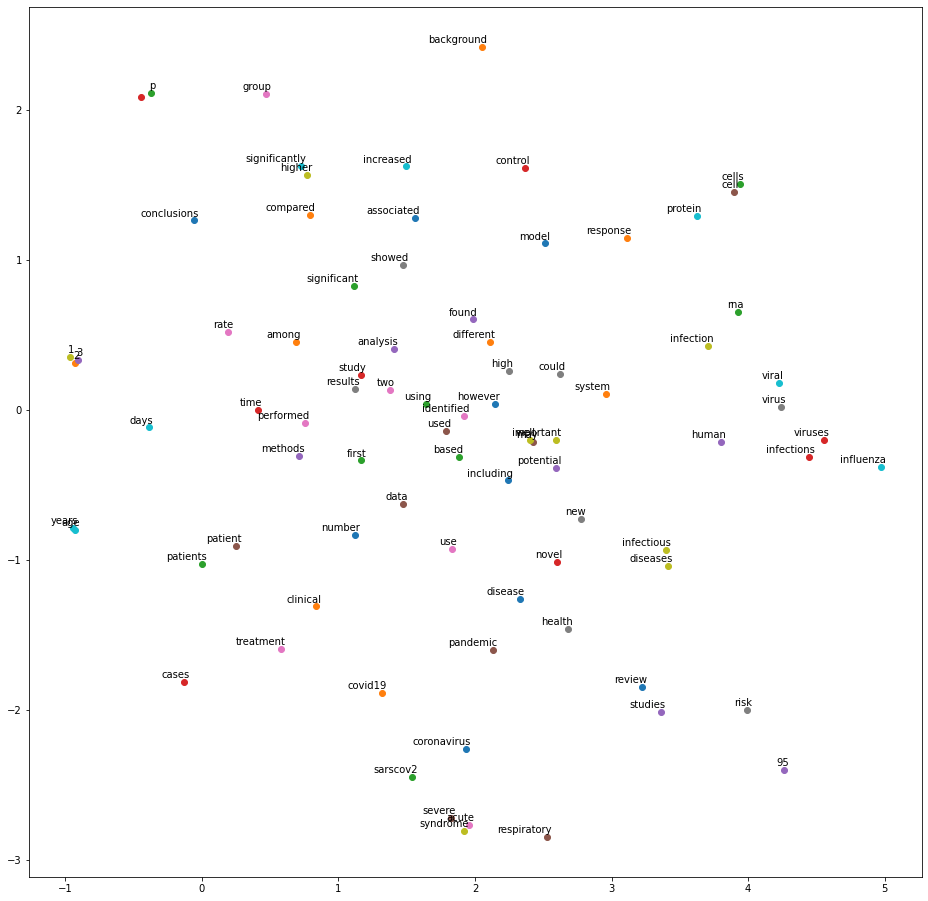

In [22]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=15000, workers=4)
tsne_plot(model)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


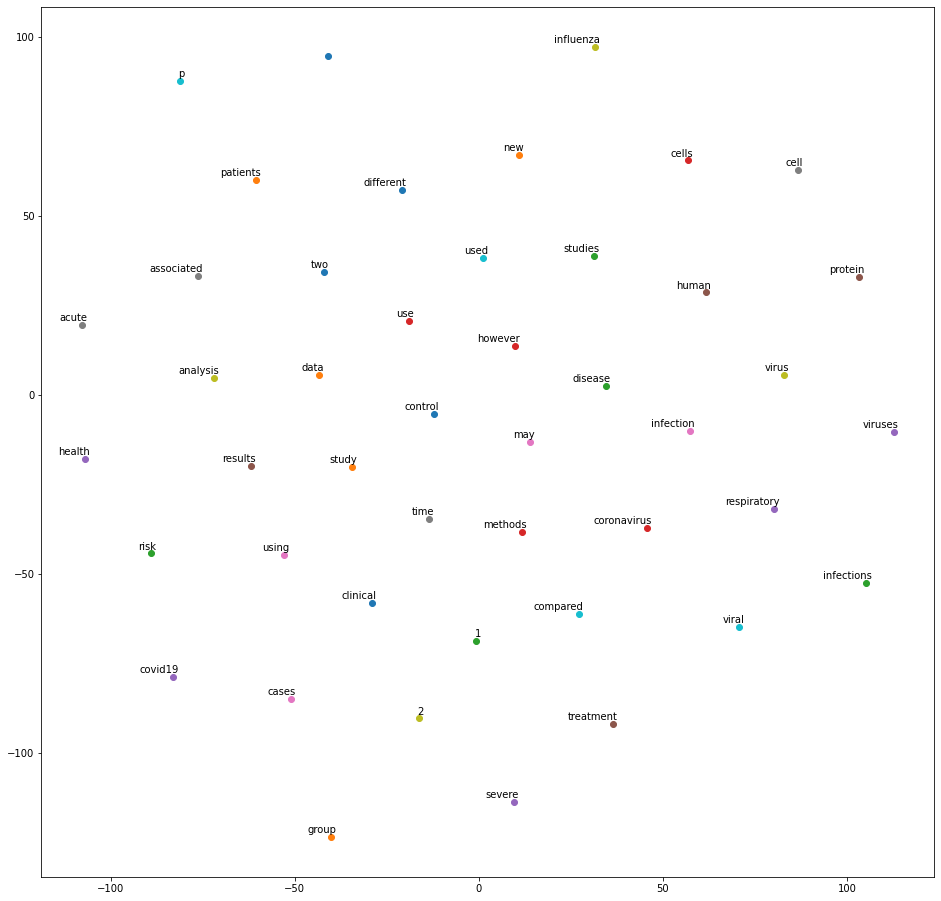

In [21]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20000, workers=4)
tsne_plot(model)